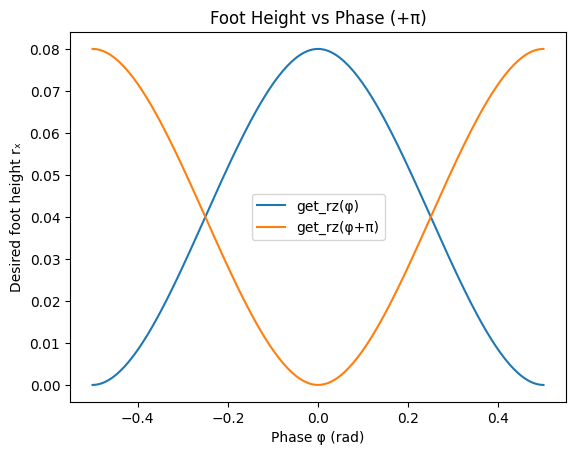

In [1]:
import numpy as np
import jax.numpy as jp
import jax

from typing import Union


def get_rz(
    phi: Union[jax.Array, float], swing_height: Union[jax.Array, float] = 0.08
) -> jax.Array:
    def cubic_bezier_interpolation(y0, y1, x):
        dy = y1 - y0
        B = x**3 + 3 * (x**2 * (1 - x))
        return y0 + dy * B

    x = (phi + np.pi) / (2 * np.pi)
    stance = cubic_bezier_interpolation(0.0, swing_height, 2 * x)
    swing  = cubic_bezier_interpolation(swing_height, 0.0, 2 * x - 1)
    return jp.where(x <= 0.5, stance, swing)

phis_l = np.linspace(-np.pi, np.pi, 200)
phis_r = np.linspace(0, 2*np.pi, 200)
t_frame = phis_l/(np.pi*2)

phis_l_n = jp.fmod(phis_l + jp.pi, 2 * jp.pi) - jp.pi
phis_r_n = jp.fmod(phis_r + jp.pi, 2 * jp.pi) - jp.pi

y1   = get_rz(phis_l_n)
y2   = get_rz(phis_r_n)

import matplotlib.pyplot as plt
# Still plot using same reference frame
plt.plot(t_frame, y1, label="get_rz(φ)")
plt.plot(t_frame, y2, label="get_rz(φ+π)")
plt.xlabel("Phase φ (rad)")
plt.ylabel("Desired foot height rₓ")
plt.title("Foot Height vs Phase (+π)")
plt.legend()
plt.show()

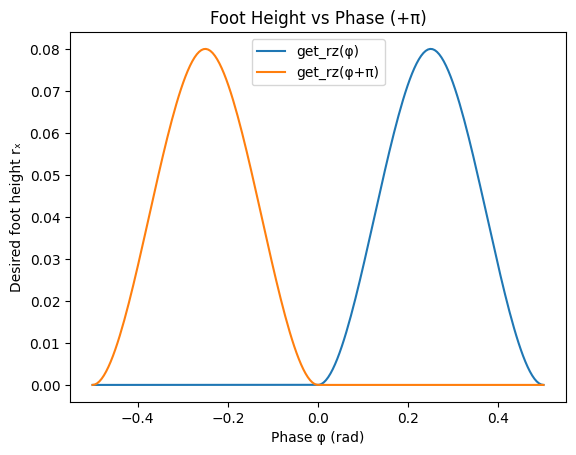

In [2]:
import numpy as np
import jax.numpy as jp

def get_rz(
    phi: Union[jax.Array, float], swing_height: Union[jax.Array, float] = 0.08
) -> jax.Array:
    def cubic_bezier_interpolation(y0, y1, x):
        dy = y1 - y0
        B = x**3 + 3 * (x**2 * (1 - x))
        return y0 + dy * B

    x = (phi + np.pi) / (2 * np.pi)
    stance = 0.0
    swing_up = cubic_bezier_interpolation(0.0, swing_height, 4*(x-0.5))
    swing_down  = cubic_bezier_interpolation(swing_height, 0.0, 4*(x-0.75))
    height = jp.where(x <= 0.5, stance, jp.where(x<=0.75, swing_up, swing_down))
    return height

phis_l = np.linspace(-np.pi, np.pi, 200)
phis_r = np.linspace(0, 2*np.pi, 200)
t_frame = phis_l/(np.pi*2)

phis_l_n = jp.fmod(phis_l + jp.pi, 2 * jp.pi) - jp.pi
phis_r_n = jp.fmod(phis_r + jp.pi, 2 * jp.pi) - jp.pi

y1   = get_rz(phis_l_n)
y2   = get_rz(phis_r_n)

import matplotlib.pyplot as plt
# Still plot using same reference frame
plt.plot(t_frame, y1, label="get_rz(φ)")
plt.plot(t_frame, y2, label="get_rz(φ+π)")
plt.xlabel("Phase φ (rad)")
plt.ylabel("Desired foot height rₓ")
plt.title("Foot Height vs Phase (+π)")
plt.legend()
plt.show()

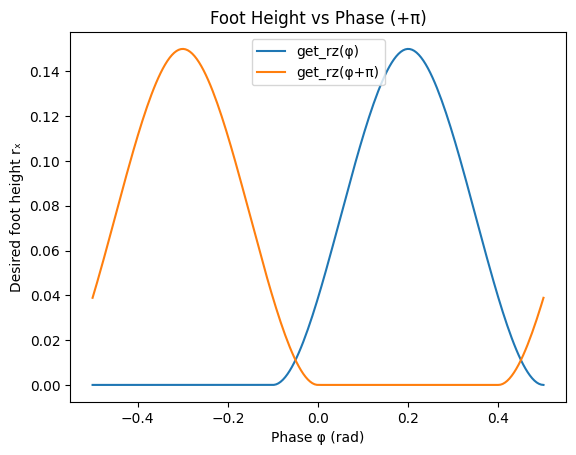

In [5]:
import numpy as np
import jax.numpy as jp

def get_rz(
    phi: Union[jax.Array, float], swing_height: Union[jax.Array, float] = 0.15, airtime: float = 0.6,
) -> jax.Array:
    def cubic_bezier_interpolation(y0, y1, x):
        dy = y1 - y0
        B = x**3 + 3 * (x**2 * (1 - x))
        return y0 + dy * B

    x = (phi + np.pi) / (2 * np.pi)
    stance = 0.0
    k_swing = 2.0 / airtime
    mid_swing = 0.5 + 0.5*(1.0-airtime)
    swing_up = cubic_bezier_interpolation(0.0, swing_height, k_swing*(x+airtime-1.0))
    swing_down  = cubic_bezier_interpolation(swing_height, 0.0, k_swing*(x-mid_swing))
    height = jp.where(x <= (1.0-airtime), stance, jp.where(x<=mid_swing, swing_up, swing_down))
    return height

phis_l = np.linspace(-np.pi, np.pi, 200)
phis_r = np.linspace(0, 2*np.pi, 200)
t_frame = phis_l/(np.pi*2)

phis_l_n = jp.fmod(phis_l + jp.pi, 2 * jp.pi) - jp.pi
phis_r_n = jp.fmod(phis_r + jp.pi, 2 * jp.pi) - jp.pi

y1   = get_rz(phis_l_n)
y2   = get_rz(phis_r_n)

import matplotlib.pyplot as plt
# Still plot using same reference frame
plt.plot(t_frame, y1, label="get_rz(φ)")
plt.plot(t_frame, y2, label="get_rz(φ+π)")
plt.xlabel("Phase φ (rad)")
plt.ylabel("Desired foot height rₓ")
plt.title("Foot Height vs Phase (+π)")
plt.legend()
plt.show()

In [4]:
# RPY to Quaternion conversion in Jupyter Notebook

from scipy.spatial.transform import Rotation as R
import numpy as np

# Define roll, pitch, yaw in radians
roll  = np.deg2rad(90)   # Replace with your value
pitch = np.deg2rad(0)
yaw   = np.deg2rad(0)

# Create rotation object
r = R.from_euler('xyz', [roll, pitch, yaw])

# Get quaternion (x, y, z, w)
quat = r.as_quat()

print("Quaternion (x, y, z, w):", quat)

Quaternion (x, y, z, w): [0.70710678 0.         0.         0.70710678]
